In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the data

In [2]:
car_df=pd.read_csv('car data.csv')

In [3]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Exploratory Data Analysis

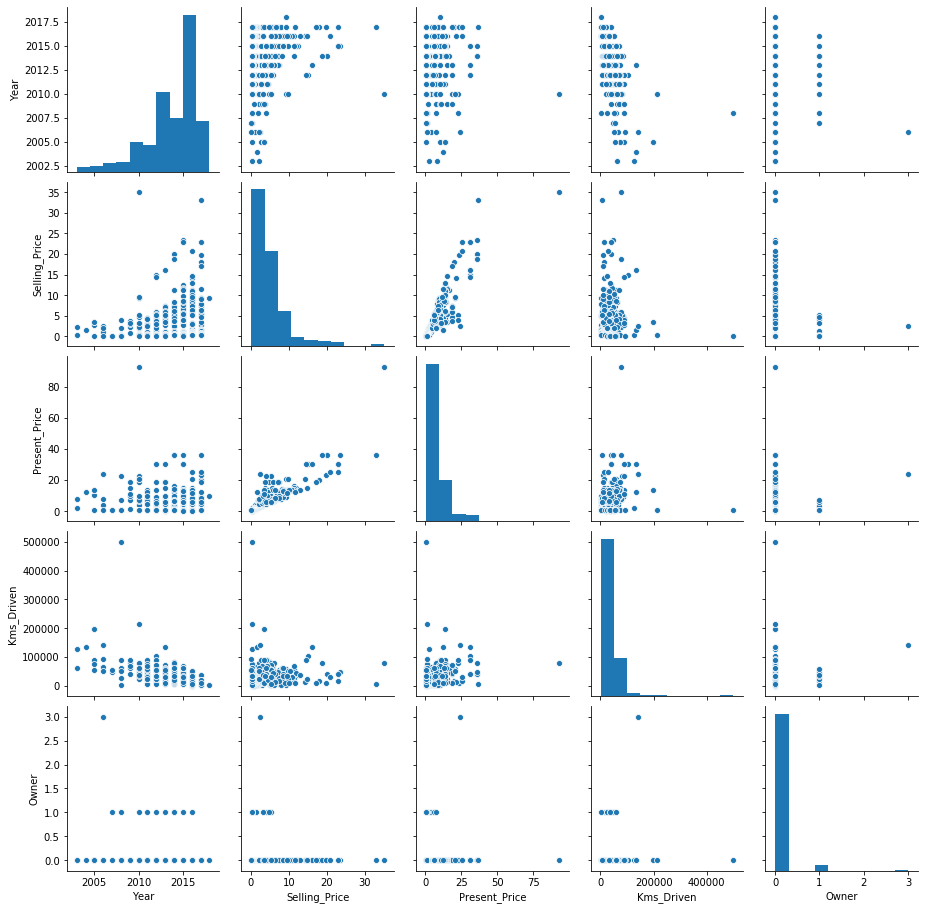

In [8]:
sns.pairplot(car_df)

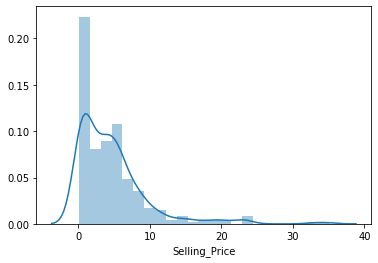

In [9]:
sns.distplot(car_df['Selling_Price'])

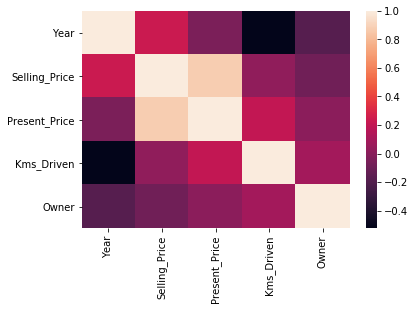

In [10]:
sns.heatmap(car_df.corr())

# Training and Testing

In [11]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
x=car_df[['Year','Present_Price','Kms_Driven','Owner']]

In [13]:
y=car_df['Selling_Price']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=109)

In [16]:
x_train.shape

(240, 4)

In [17]:
x_test.shape

(61, 4)

In [18]:
y_train.shape

(240,)

In [19]:
y_test.shape

(61,)

# Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model=LinearRegression()

In [22]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predicting Test Data

In [23]:
y_predict=model.predict(x_test)

In [24]:
y_predict

array([ 3.66742913,  5.67445908,  6.97155455,  8.80279298,  5.20878436,
        8.77013233,  4.90660423,  4.44693914,  2.74748224, -2.15166769,
       11.88902752,  3.27543191,  6.1204276 , -0.78786847,  2.10473962,
        9.11430232,  0.99674339, -2.57727151,  8.78668431,  3.91606388,
        4.27923906,  8.24608624,  4.25370846,  3.62581466,  2.02954995,
       -0.20838082,  4.3660951 ,  5.26751839,  2.26144357,  7.07472679,
        2.20153722,  4.07822899,  5.45285621,  7.85005399,  0.67088383,
        1.84639276,  4.24943079,  5.92919353,  1.80982751,  0.33728487,
        6.86238583,  2.17504089,  7.90346385,  2.60580714, 19.85790748,
        2.06702539,  1.38470092,  3.37299049,  6.22877919,  6.45080844,
        1.24088896,  1.38263007,  1.61360931, -0.7059021 ,  5.45584281,
        5.38561426,  5.60363212,  7.81189505,  9.51343685, 19.39942537,
        6.12960634])

In [25]:
y_predict.shape

(61,)

In [26]:
print(model.intercept_)

-937.1861938363168


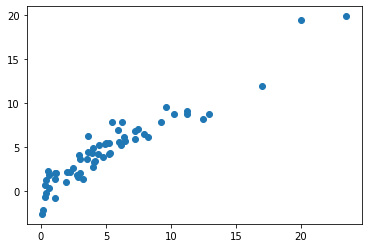

In [27]:
plt.scatter(y_test,y_predict)

# Evaluating the Model

In [28]:
from sklearn import metrics

In [29]:
print('MAE:',metrics.mean_absolute_error(y_test,y_predict))
print('MSE:',metrics.mean_squared_error(y_test,y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

MAE: 1.2155011943187126
MSE: 2.5956634368574614
RMSE: 1.6111062773316542
